<a href="https://colab.research.google.com/github/DianaAguilar-A01733009/Actividad1/blob/main/Actividad1_MEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar librerias y carga del documento

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar archivo csv desde el equipo

from google.colab import files
files.upload()

Saving listings.csv to listings.csv


In [ ]:
df = pd.read_csv('listings_MEX.csv')
df.head()

In [77]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

#Filtrado

In [ ]:
df = df[['host_acceptance_rate', 'review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365', 'review_scores_communication', 'room_type', 'number_of_reviews']]
df

In [ ]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")
df

In [107]:
df['host_acceptance_rate']=df['host_acceptance_rate'].astype({'host_acceptance_rate': 'float64'})
df['price']=df['price'].astype({'price': 'float64'})
df['availability_365']=df['availability_365'].astype({'availability_365': 'float64'})
df['number_of_reviews']=df['number_of_reviews'].astype({'number_of_reviews': 'float64'})

In [108]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
EntireHome=df[df['room_type']=='Entire home/apt']
EntireHome.head()

In [ ]:
PrivateRoom=df[df['room_type']=='Private room']
PrivateRoom.head()

In [ ]:
SharedRoom=df[df['room_type']=='Shared room']
SharedRoom.head()

#Limpieza de Base de datos

##Entire Home

In [ ]:
#Remplazar datos nulos con promedios
from numpy import nan as NaN
EntireHome=EntireHome.fillna({'host_acceptance_rate':float(EntireHome['host_acceptance_rate'].mean())})
EntireHome=EntireHome.fillna({'review_scores_rating':float(EntireHome['review_scores_rating'].mean())})
EntireHome=EntireHome.fillna({'review_scores_cleanliness':float(EntireHome['review_scores_cleanliness'].mean())})
EntireHome=EntireHome.fillna({'review_scores_communication':float(EntireHome['review_scores_communication'].mean())})

EntireHome

In [113]:
#Eliminación de outliers
y=EntireHome

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

df3= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

Limite superior permitido host_acceptance_rate            110.500000
review_scores_rating              5.285000
price                          3242.500000
review_scores_cleanliness         5.285000
availability_365                662.500000
review_scores_communication       5.237749
number_of_reviews               115.500000
dtype: float64
Limite inferior permitido host_acceptance_rate            82.500000
review_scores_rating             4.365000
price                         -665.500000
review_scores_cleanliness        4.445000
availability_365              -181.500000
review_scores_communication      4.603751
number_of_reviews              -64.500000
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  del sys.path[0]


,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
0,NaN,NaN,NaN,NaN,363.0,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.59,NaN,4.70,331.0,4.75,NaN,58.0
4,100.0,4.85,740.0,4.80,314.0,4.95,NaN,61.0
...,...,...,...,...,...,...,...,...
22943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22945,100.0,4.89,NaN,4.96,348.0,4.93,NaN,28.0
22946,99.0,4.44,1100.0,4.64,361.0,NaN,NaN,72.0


In [114]:
#Llenar los outliers con el promedio
EntireHome=df3.fillna(round(df3.mean(),1))
EntireHome

,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
0,98.2,4.80,1252.7,4.90,363.0,4.90,NaN,0.0
1,98.2,4.80,1252.7,4.90,237.6,4.90,NaN,23.5
2,98.2,4.80,1252.7,4.90,237.6,4.90,NaN,23.5
3,98.2,4.59,1252.7,4.70,331.0,4.75,NaN,58.0
4,100.0,4.85,740.0,4.80,314.0,4.95,NaN,61.0
...,...,...,...,...,...,...,...,...
22943,98.2,4.80,1252.7,4.90,237.6,4.90,NaN,23.5
22944,98.2,4.80,1252.7,4.90,237.6,4.90,NaN,23.5
22945,100.0,4.89,1252.7,4.96,348.0,4.93,NaN,28.0
22946,99.0,4.44,1100.0,4.64,361.0,4.90,NaN,72.0


In [115]:
print(len(EntireHome)-EntireHome.count())

host_acceptance_rate               0
review_scores_rating               0
price                              0
review_scores_cleanliness          0
availability_365                   0
review_scores_communication        0
room_type                      22948
number_of_reviews                  0
dtype: int64


##PrivateRoom

In [ ]:
#Remplazar datos nulos con promedios
from numpy import nan as NaN
PrivateRoom=PrivateRoom.fillna({'host_acceptance_rate':float(PrivateRoom['host_acceptance_rate'].mean())})
PrivateRoom=PrivateRoom.fillna({'review_scores_rating':float(PrivateRoom['review_scores_rating'].mean())})
PrivateRoom=PrivateRoom.fillna({'review_scores_cleanliness':float(PrivateRoom['review_scores_cleanliness'].mean())})
PrivateRoom=PrivateRoom.fillna({'review_scores_communication':float(PrivateRoom['review_scores_communication'].mean())})

PrivateRoom

In [ ]:
#Eliminación de outliers
y=PrivateRoom

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

df3= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

In [ ]:
#Llenar los outliers con el promedio
PrivateRoom=df3.fillna(round(df3.mean(),1))
PrivateRoom

In [120]:
print(len(PrivateRoom)-PrivateRoom.count())

host_acceptance_rate               0
review_scores_rating               0
price                              0
review_scores_cleanliness          0
availability_365                   0
review_scores_communication        0
room_type                      22948
number_of_reviews                  0
dtype: int64


##SharedRoom

In [ ]:
#Remplazar datos nulos con promedios
from numpy import nan as NaN
SharedRoom=SharedRoom.fillna({'host_acceptance_rate':float(SharedRoom['host_acceptance_rate'].mean())})
SharedRoom=SharedRoom.fillna({'review_scores_rating':float(SharedRoom['review_scores_rating'].mean())})
SharedRoom=SharedRoom.fillna({'review_scores_cleanliness':float(SharedRoom['review_scores_cleanliness'].mean())})
SharedRoom=SharedRoom.fillna({'review_scores_communication':float(SharedRoom['review_scores_communication'].mean())})

SharedRoom

In [ ]:
#Eliminación de outliers
y=SharedRoom

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

df3= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

In [ ]:
#Llenar los outliers con el promedio
SharedRoom=df3.fillna(round(df3.mean(),1))
SharedRoom

In [ ]:
print(len(SharedRoom)-SharedRoom.count())

#Análisis de correlaciones por tipo de cuarto

##Entire home/apt

In [126]:
Vars_Dep = EntireHome['number_of_reviews']
Vars_Indep1 = EntireHome[['host_acceptance_rate']]
Vars_Indep2 = EntireHome[['review_scores_rating']]
Vars_Indep3 = EntireHome[['price']]
Vars_Indep4 = EntireHome[['review_scores_cleanliness']]
Vars_Indep5 = EntireHome[['availability_365']]
Vars_Indep6 = EntireHome[['review_scores_communication']]
from sklearn.linear_model import LinearRegression

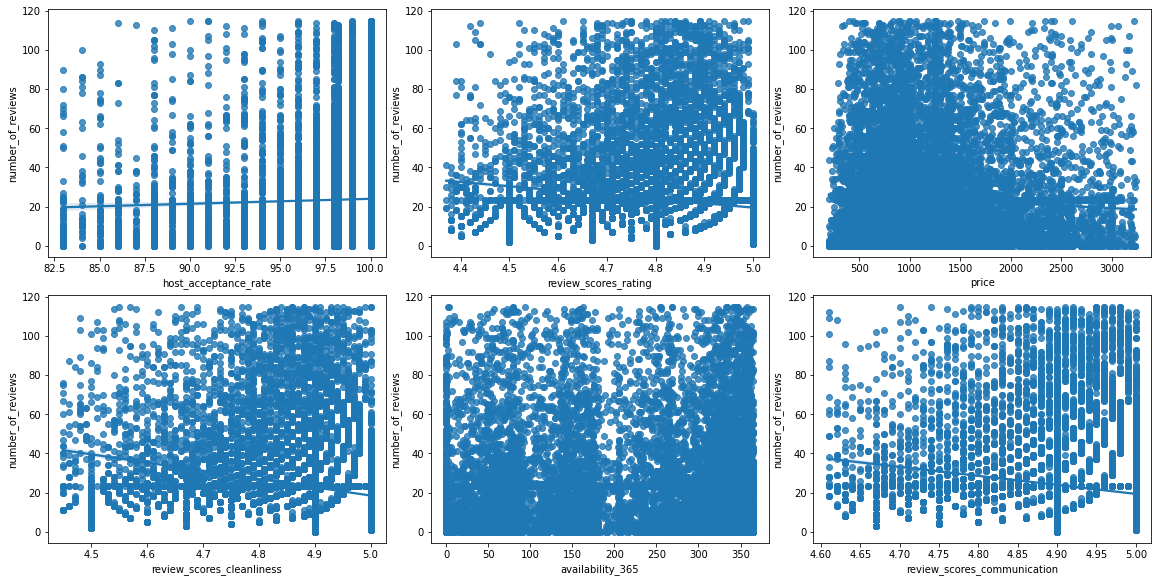

In [127]:
#Gráficas de correlaciones 
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=EntireHome.loc[:,column_sels]#variables explicativas

y=EntireHome['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))

#index=0

axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=EntireHome,ax=axs[i])
  plt.tight_layout(pad=0.4)

In [128]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

In [129]:
# Correlación de number_of_reviews vs host_acceptance_rate 

model1.fit(X = Vars_Indep1, y = Vars_Dep)
model1.__dict__
model1.score(Vars_Indep1, Vars_Dep)

0.0009004309613001027

In [130]:
# Correlación de number_of_reviews vs review_scores_rating 

model2.fit(X = Vars_Indep2, y = Vars_Dep)
model2.__dict__
model2.score(Vars_Indep2, Vars_Dep)

0.014570940639800245

In [131]:
# Correlación de number_of_reviews vs price 

model3.fit(X = Vars_Indep3, y = Vars_Dep)
model3.__dict__
model3.score(Vars_Indep3, Vars_Dep)

0.0034644064152085097

In [132]:
# Correlación de number_of_reviews vs review_scores_cleanliness 

model4.fit(X = Vars_Indep4, y = Vars_Dep)
model4.__dict__
model4.score(Vars_Indep4, Vars_Dep)

0.043227468549028814

In [133]:
# Correlación de number_of_reviews vs availability_365

model5.fit(X = Vars_Indep5, y = Vars_Dep)
model5.__dict__
model5.score(Vars_Indep5, Vars_Dep)

0.005270715578081342

In [134]:
# Correlación de number_of_reviews vs review_scores_communication

model6.fit(X = Vars_Indep6, y = Vars_Dep)
model6.__dict__
model6.score(Vars_Indep6, Vars_Dep)

0.024180778699782635

## Private room

In [135]:
Vars_Dep = PrivateRoom['number_of_reviews']
Vars_Indep1 = PrivateRoom[['host_acceptance_rate']]
Vars_Indep2 = PrivateRoom[['review_scores_rating']]
Vars_Indep3 = PrivateRoom[['price']]
Vars_Indep4 = PrivateRoom[['review_scores_cleanliness']]
Vars_Indep5 = PrivateRoom[['availability_365']]
Vars_Indep6 = PrivateRoom[['review_scores_communication']]
from sklearn.linear_model import LinearRegression

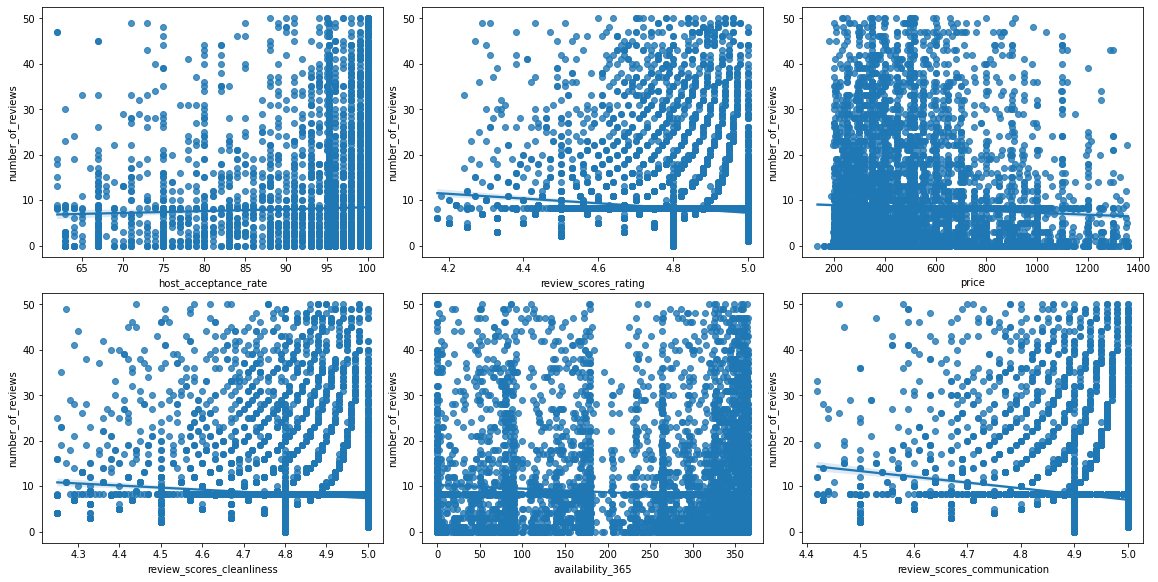

In [136]:
#Gráficas de correlaciones 
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=PrivateRoom.loc[:,column_sels]#variables explicativas

y=PrivateRoom['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))

#index=0

axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=PrivateRoom,ax=axs[i])
  plt.tight_layout(pad=0.4)

In [137]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

In [138]:
# Correlación de number_of_reviews vs host_acceptance_rate 

model1.fit(X = Vars_Indep1, y = Vars_Dep)
model1.__dict__
model1.score(Vars_Indep1, Vars_Dep)

0.0007734286176459548

In [139]:
# Correlación de number_of_reviews vs review_scores_rating 

model2.fit(X = Vars_Indep2, y = Vars_Dep)
model2.__dict__
model2.score(Vars_Indep2, Vars_Dep)

0.0056355741781011215

In [140]:
# Correlación de number_of_reviews vs price 

model3.fit(X = Vars_Indep3, y = Vars_Dep)
model3.__dict__
model3.score(Vars_Indep3, Vars_Dep)

0.002142075223939832

In [141]:
# Correlación de number_of_reviews vs review_scores_cleanliness 

model4.fit(X = Vars_Indep4, y = Vars_Dep)
model4.__dict__
model4.score(Vars_Indep4, Vars_Dep)

0.0040901726702679

In [142]:
# Correlación de number_of_reviews vs availability_365

model5.fit(X = Vars_Indep5, y = Vars_Dep)
model5.__dict__
model5.score(Vars_Indep5, Vars_Dep)

0.008169466549630577

In [143]:
# Correlación de number_of_reviews vs review_scores_communication

model6.fit(X = Vars_Indep6, y = Vars_Dep)
model6.__dict__
model6.score(Vars_Indep6, Vars_Dep)

0.015314311323102126

## Shared room

In [144]:
Vars_Dep = SharedRoom['number_of_reviews']
Vars_Indep1 = SharedRoom[['host_acceptance_rate']]
Vars_Indep2 = SharedRoom[['review_scores_rating']]
Vars_Indep3 = SharedRoom[['price']]
Vars_Indep4 = SharedRoom[['review_scores_cleanliness']]
Vars_Indep5 = SharedRoom[['availability_365']]
Vars_Indep6 = SharedRoom[['review_scores_communication']]
from sklearn.linear_model import LinearRegression

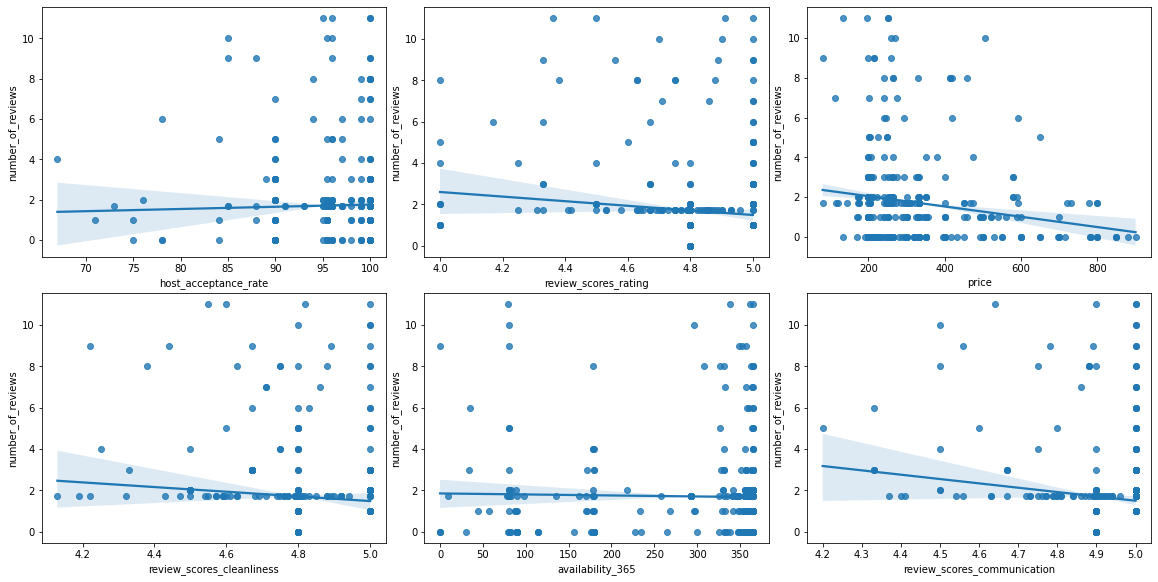

In [145]:
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=SharedRoom.loc[:,column_sels]#variables explicativas

y=SharedRoom['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))

#index=0

axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=SharedRoom,ax=axs[i])
  plt.tight_layout(pad=0.4)

In [146]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

In [147]:
# Correlación de number_of_reviews vs host_acceptance_rate 

model1.fit(X = Vars_Indep1, y = Vars_Dep)
model1.__dict__
model1.score(Vars_Indep1, Vars_Dep)

0.0005331631324386743

In [148]:
# Correlación de number_of_reviews vs review_scores_rating 

model2.fit(X = Vars_Indep2, y = Vars_Dep)
model2.__dict__
model2.score(Vars_Indep2, Vars_Dep)

0.009686255048090064

In [149]:
# Correlación de number_of_reviews vs price 

model3.fit(X = Vars_Indep3, y = Vars_Dep)
model3.__dict__
model3.score(Vars_Indep3, Vars_Dep)

0.03051857649815848

In [150]:
# Correlación de number_of_reviews vs review_scores_cleanliness 

model4.fit(X = Vars_Indep4, y = Vars_Dep)
model4.__dict__
model4.score(Vars_Indep4, Vars_Dep)

0.005221379805612325

In [151]:
# Correlación de number_of_reviews vs availability_365

model5.fit(X = Vars_Indep5, y = Vars_Dep)
model5.__dict__
model5.score(Vars_Indep5, Vars_Dep)

0.0005093093869634746

In [152]:
# Correlación de number_of_reviews vs review_scores_communication

model6.fit(X = Vars_Indep6, y = Vars_Dep)
model6.__dict__
model6.score(Vars_Indep6, Vars_Dep)

0.012994962512203001

#Creación del modelo predictivo

In [153]:
from sklearn.linear_model import LinearRegression

##Entire home/apt

In [154]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepEntHom = EntireHome[['host_acceptance_rate']]
Var_DepEntHom = EntireHome['number_of_reviews']
#Se define model como la función de regresión lineal
modelEntHom= LinearRegression()
modelEntHom.fit(X=Vars_IndepEntHom, y=Var_DepEntHom)
y_predEntHom=modelEntHom.predict(X=EntireHome[['number_of_reviews']])
EntireHome.insert(0,'Predicciones_EntireHome',y_predEntHom)
EntireHome

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- host_acceptance_rate

  warnings.warn(message, FutureWarning)


,Predicciones_EntireHome,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
0,-1.438380,98.2,4.80,1252.7,4.90,363.0,4.90,NaN,0.0
1,4.523763,98.2,4.80,1252.7,4.90,237.6,4.90,NaN,23.5
2,4.523763,98.2,4.80,1252.7,4.90,237.6,4.90,NaN,23.5
3,13.276698,98.2,4.59,1252.7,4.70,331.0,4.75,NaN,58.0
4,14.037822,100.0,4.85,740.0,4.80,314.0,4.95,NaN,61.0
...,...,...,...,...,...,...,...,...,...
22943,4.523763,98.2,4.80,1252.7,4.90,237.6,4.90,NaN,23.5
22944,4.523763,98.2,4.80,1252.7,4.90,237.6,4.90,NaN,23.5
22945,5.665450,100.0,4.89,1252.7,4.96,348.0,4.93,NaN,28.0
22946,16.828613,99.0,4.44,1100.0,4.64,361.0,4.90,NaN,72.0


In [155]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterEntHom=modelEntHom.score(X=Vars_IndepEntHom, y=Var_DepEntHom)
coef_DeterEntHom

0.0009004309613001027

##Private room

In [156]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepPrivRoom = PrivateRoom[['host_acceptance_rate']]
Var_DepPrivRoom = PrivateRoom['number_of_reviews']
#Se define model como la función de regresión lineal
modelPrivRoom= LinearRegression()
modelPrivRoom.fit(X=Vars_IndepPrivRoom, y=Var_DepPrivRoom)
y_predPrivRoom=modelPrivRoom.predict(X=PrivateRoom[['number_of_reviews']])
PrivateRoom.insert(0,'Predicciones_PrivateRoom',y_predPrivRoom)
PrivateRoom

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- host_acceptance_rate

  warnings.warn(message, FutureWarning)


,Predicciones_PrivateRoom,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
0,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
1,5.372000,100.0,4.96,500.0,4.93,363.0,4.93,NaN,27.0
2,4.588506,67.0,4.73,599.0,4.70,323.0,4.91,NaN,8.2
3,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
4,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
...,...,...,...,...,...,...,...,...,...
22943,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
22944,4.371795,95.2,5.00,750.0,5.00,89.0,5.00,NaN,3.0
22945,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
22946,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2


In [157]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterPrivRoom=modelPrivRoom.score(X=Vars_IndepPrivRoom, y=Var_DepPrivRoom)
coef_DeterPrivRoom

0.0007734286176459548

##Private room

In [158]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepPrivRoom = PrivateRoom[['host_acceptance_rate']]
Var_DepPrivRoom = PrivateRoom['number_of_reviews']
#Se define model como la función de regresión lineal
modelPrivRoom= LinearRegression()
modelPrivRoom.fit(X=Vars_IndepPrivRoom, y=Var_DepPrivRoom)
y_predPrivRoom=modelPrivRoom.predict(X=PrivateRoom[['number_of_reviews']])
PrivateRoom.insert(0,'Predicciones',y_predPrivRoom)
PrivateRoom

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- host_acceptance_rate

  warnings.warn(message, FutureWarning)


,Predicciones,Predicciones_PrivateRoom,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
0,4.588506,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
1,5.372000,5.372000,100.0,4.96,500.0,4.93,363.0,4.93,NaN,27.0
2,4.588506,4.588506,67.0,4.73,599.0,4.70,323.0,4.91,NaN,8.2
3,4.588506,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
4,4.588506,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
...,...,...,...,...,...,...,...,...,...,...
22943,4.588506,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
22944,4.371795,4.371795,95.2,5.00,750.0,5.00,89.0,5.00,NaN,3.0
22945,4.588506,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2
22946,4.588506,4.588506,95.2,4.80,515.6,4.80,251.7,4.90,NaN,8.2


In [159]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterPrivRoom=modelPrivRoom.score(X=Vars_IndepPrivRoom, y=Var_DepPrivRoom)
coef_DeterPrivRoom

0.0007734286176459548

## Shared room

In [160]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepSharRoom = SharedRoom[['host_acceptance_rate']]
Var_DepSharRoom = SharedRoom['number_of_reviews']
#Se define model como la función de regresión lineal
modelSharRoom = LinearRegression()
modelSharRoom.fit(X=Vars_IndepSharRoom, y=Var_DepSharRoom)
y_predSharRoom=modelSharRoom.predict(X=SharedRoom[['number_of_reviews']])
SharedRoom.insert(0,'Predicciones',y_predSharRoom)
SharedRoom

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- number_of_reviews
Feature names seen at fit time, yet now missing:
- host_acceptance_rate

  warnings.warn(message, FutureWarning)


,Predicciones,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
0,0.671071,95.4,4.8,332.9,4.8,292.8,4.9,NaN,1.7
1,0.671071,95.4,4.8,332.9,4.8,292.8,4.9,NaN,1.7
2,0.671071,95.4,4.8,332.9,4.8,292.8,4.9,NaN,1.7
3,0.671071,95.4,4.8,332.9,4.8,292.8,4.9,NaN,1.7
4,0.671071,95.4,4.8,332.9,4.8,292.8,4.9,NaN,1.7
...,...,...,...,...,...,...,...,...,...
22943,0.652406,95.4,4.8,450.0,4.8,365.0,4.9,NaN,0.0
22944,0.671071,95.4,4.8,332.9,4.8,292.8,4.9,NaN,1.7
22945,0.671071,95.4,4.8,332.9,4.8,292.8,4.9,NaN,1.7
22946,0.671071,95.4,4.8,332.9,4.8,292.8,4.9,NaN,1.7


In [161]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterSharRoom=modelSharRoom.score(X=Vars_IndepSharRoom, y=Var_DepSharRoom)
coef_DeterSharRoom

0.0005331631324386743

# Tablas de correlación y determinación

##Entire home/apt

In [162]:
#Tabla de correlación

Corr_factoresEntireHome=EntireHome.corr()
Corr_factoresEntireHome

,Predicciones_EntireHome,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones_EntireHome,1.000000,0.030007,-0.120710,-0.058859,-0.207912,-0.072600,-0.155502,NaN,1.000000
host_acceptance_rate,0.030007,1.000000,-0.010317,0.030287,0.020066,0.064165,-0.016215,NaN,0.030007
review_scores_rating,-0.120710,-0.010317,1.000000,0.123884,0.491470,-0.087712,0.538377,NaN,-0.120710
price,-0.058859,0.030287,0.123884,1.000000,0.114736,0.041327,0.059271,NaN,-0.058859
review_scores_cleanliness,-0.207912,0.020066,0.491470,0.114736,1.000000,-0.005057,0.343191,NaN,-0.207912
availability_365,-0.072600,0.064165,-0.087712,0.041327,-0.005057,1.000000,-0.090068,NaN,-0.072600
review_scores_communication,-0.155502,-0.016215,0.538377,0.059271,0.343191,-0.090068,1.000000,NaN,-0.155502
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,1.000000,0.030007,-0.120710,-0.058859,-0.207912,-0.072600,-0.155502,NaN,1.000000


In [163]:
#Tabla de determinación

Det_factoresEntireHome=(EntireHome.corr())**2
Det_factoresEntireHome

,Predicciones_EntireHome,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones_EntireHome,1.000000,0.000900,0.014571,0.003464,0.043227,0.005271,0.024181,NaN,1.000000
host_acceptance_rate,0.000900,1.000000,0.000106,0.000917,0.000403,0.004117,0.000263,NaN,0.000900
review_scores_rating,0.014571,0.000106,1.000000,0.015347,0.241543,0.007693,0.289850,NaN,0.014571
price,0.003464,0.000917,0.015347,1.000000,0.013164,0.001708,0.003513,NaN,0.003464
review_scores_cleanliness,0.043227,0.000403,0.241543,0.013164,1.000000,0.000026,0.117780,NaN,0.043227
availability_365,0.005271,0.004117,0.007693,0.001708,0.000026,1.000000,0.008112,NaN,0.005271
review_scores_communication,0.024181,0.000263,0.289850,0.003513,0.117780,0.008112,1.000000,NaN,0.024181
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,1.000000,0.000900,0.014571,0.003464,0.043227,0.005271,0.024181,NaN,1.000000


## Private room

In [164]:
#Tabla de correlación

Corr_factoresPrivRoom=PrivateRoom.corr()
Corr_factoresPrivRoom

,Predicciones,Predicciones_PrivateRoom,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones,1.000000,1.000000,0.027811,-0.075070,-0.046283,-0.063954,-0.090385,-0.123751,NaN,1.000000
Predicciones_PrivateRoom,1.000000,1.000000,0.027811,-0.075070,-0.046283,-0.063954,-0.090385,-0.123751,NaN,1.000000
host_acceptance_rate,0.027811,0.027811,1.000000,-0.056308,0.035996,-0.020570,0.032604,-0.053263,NaN,0.027811
review_scores_rating,-0.075070,-0.075070,-0.056308,1.000000,0.007596,0.606382,-0.104703,0.550754,NaN,-0.075070
price,-0.046283,-0.046283,0.035996,0.007596,1.000000,0.073338,0.074251,-0.002049,NaN,-0.046283
review_scores_cleanliness,-0.063954,-0.063954,-0.020570,0.606382,0.073338,1.000000,-0.066222,0.437119,NaN,-0.063954
availability_365,-0.090385,-0.090385,0.032604,-0.104703,0.074251,-0.066222,1.000000,-0.069819,NaN,-0.090385
review_scores_communication,-0.123751,-0.123751,-0.053263,0.550754,-0.002049,0.437119,-0.069819,1.000000,NaN,-0.123751
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,1.000000,1.000000,0.027811,-0.075070,-0.046283,-0.063954,-0.090385,-0.123751,NaN,1.000000


In [165]:
#Tabla de determinación

Det_factoresPrivRoom=(PrivateRoom.corr())**2
Det_factoresPrivRoom

,Predicciones,Predicciones_PrivateRoom,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones,1.000000,1.000000,0.000773,0.005636,0.002142,0.004090,0.008169,0.015314,NaN,1.000000
Predicciones_PrivateRoom,1.000000,1.000000,0.000773,0.005636,0.002142,0.004090,0.008169,0.015314,NaN,1.000000
host_acceptance_rate,0.000773,0.000773,1.000000,0.003171,0.001296,0.000423,0.001063,0.002837,NaN,0.000773
review_scores_rating,0.005636,0.005636,0.003171,1.000000,0.000058,0.367699,0.010963,0.303330,NaN,0.005636
price,0.002142,0.002142,0.001296,0.000058,1.000000,0.005378,0.005513,0.000004,NaN,0.002142
review_scores_cleanliness,0.004090,0.004090,0.000423,0.367699,0.005378,1.000000,0.004385,0.191073,NaN,0.004090
availability_365,0.008169,0.008169,0.001063,0.010963,0.005513,0.004385,1.000000,0.004875,NaN,0.008169
review_scores_communication,0.015314,0.015314,0.002837,0.303330,0.000004,0.191073,0.004875,1.000000,NaN,0.015314
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,1.000000,1.000000,0.000773,0.005636,0.002142,0.004090,0.008169,0.015314,NaN,1.000000


##Shared room

In [166]:
#Tabla de correlación

Corr_factoresSharRoom=SharedRoom.corr()
Corr_factoresSharRoom

,Predicciones,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones,1.000000,0.023090,-0.098419,-0.174696,-0.072259,-0.022568,-0.113995,NaN,1.000000
host_acceptance_rate,0.023090,1.000000,-0.073057,0.194110,-0.042877,-0.049890,-0.047139,NaN,0.023090
review_scores_rating,-0.098419,-0.073057,1.000000,0.053261,0.456354,-0.055289,0.450865,NaN,-0.098419
price,-0.174696,0.194110,0.053261,1.000000,0.149211,0.008874,0.048652,NaN,-0.174696
review_scores_cleanliness,-0.072259,-0.042877,0.456354,0.149211,1.000000,-0.021745,0.487028,NaN,-0.072259
availability_365,-0.022568,-0.049890,-0.055289,0.008874,-0.021745,1.000000,-0.059248,NaN,-0.022568
review_scores_communication,-0.113995,-0.047139,0.450865,0.048652,0.487028,-0.059248,1.000000,NaN,-0.113995
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,1.000000,0.023090,-0.098419,-0.174696,-0.072259,-0.022568,-0.113995,NaN,1.000000


In [167]:
#Tabla de determinación

Det_factoresSharRoom=(SharedRoom.corr())**2
Det_factoresSharRoom

,Predicciones,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type,number_of_reviews
Predicciones,1.000000,0.000533,0.009686,0.030519,0.005221,0.000509,0.012995,NaN,1.000000
host_acceptance_rate,0.000533,1.000000,0.005337,0.037679,0.001838,0.002489,0.002222,NaN,0.000533
review_scores_rating,0.009686,0.005337,1.000000,0.002837,0.208259,0.003057,0.203279,NaN,0.009686
price,0.030519,0.037679,0.002837,1.000000,0.022264,0.000079,0.002367,NaN,0.030519
review_scores_cleanliness,0.005221,0.001838,0.208259,0.022264,1.000000,0.000473,0.237196,NaN,0.005221
availability_365,0.000509,0.002489,0.003057,0.000079,0.000473,1.000000,0.003510,NaN,0.000509
review_scores_communication,0.012995,0.002222,0.203279,0.002367,0.237196,0.003510,1.000000,NaN,0.012995
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,1.000000,0.000533,0.009686,0.030519,0.005221,0.000509,0.012995,NaN,1.000000
